# Explorando Dados e Pré-Processando Imagens
* AI for Medicine Course 1 Week 1 lecture exercises
* AI4M_C1_W1_lecture_ex_01


## Exploração de Dados
* Dataset : Imagens de raio-x de tórax obtidas do conjunto de dados público [ChestX-ray8 dataset](https://arxiv.org/abs/1705.02315)

<img src="https://telemedicinamorsch.com.br/wp-content/uploads/2016/01/rx-de-torax-padrao-oit.jpg" alt="U-net Image" width="300" align="center"/>

Primeira etapa: explorar os dados, usando o pacote Python padrão, pandas.

As células abaixo importam os pacotes : 
* pandas, para ler um arquivo csv em um dataframe e imprimir as primeiras linhas de dados
* numpy, para manipulação numérica.

In [1]:
# Import pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
sns.set()

In [2]:
# Le arquivo .csv lendo dados de treinamento
train_df = pd.read_csv("/content/drive/MyDrive/0_Cursos/1. Coursera/AI Medicine /Code/data/train-small.csv")
# Mostra as 5 primeiras linhas
print(f'Há {train_df.shape[0]} linhas e {train_df.shape[1]} colunas nesse DataFrame')
train_df.head()

Há 1000 linhas e 16 colunas nesse DataFrame


,Image,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,PatientId,Pleural_Thickening,Pneumonia,Pneumothorax
0,00008270_015.png,0,0,0,0,0,0,0,0,0,0,0,8270,0,0,0
1,00029855_001.png,1,0,0,0,1,0,0,0,1,0,0,29855,0,0,0
2,00001297_000.png,0,0,0,0,0,0,0,0,0,0,0,1297,1,0,0
3,00012359_002.png,0,0,0,0,0,0,0,0,0,0,0,12359,0,0,0
4,00017951_001.png,0,0,0,0,0,0,0,0,1,0,0,17951,0,0,0


O arquivo contém:
* os nomes das radiografias de tórax (coluna "Image"
* colunas preenchidas com uns e zeros, que  identificam quais diagnósticos foram dados com base em cada radiografia.

### Tipos de dados e valores nulos

In [3]:
# Mostra o tipo de dado de cada coluna e se há valores nulos
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Image               1000 non-null   object
 1   Atelectasis         1000 non-null   int64 
 2   Cardiomegaly        1000 non-null   int64 
 3   Consolidation       1000 non-null   int64 
 4   Edema               1000 non-null   int64 
 5   Effusion            1000 non-null   int64 
 6   Emphysema           1000 non-null   int64 
 7   Fibrosis            1000 non-null   int64 
 8   Hernia              1000 non-null   int64 
 9   Infiltration        1000 non-null   int64 
 10  Mass                1000 non-null   int64 
 11  Nodule              1000 non-null   int64 
 12  PatientId           1000 non-null   int64 
 13  Pleural_Thickening  1000 non-null   int64 
 14  Pneumonia           1000 non-null   int64 
 15  Pneumothorax        1000 non-null   int64 
dtypes: int64(15), object(1)
m

### Verificação de IDs únicos
`PatientId` possui um número de identificação para cada paciente. Importante verificar em um conjunto de dados médicos, como este, se há dados repetidos de pacientes ou se cada imagem representa uma pessoa diferente.

In [4]:
print(f" O total de pacientes é {train_df['PatientId'].count()}, sendo {train_df['PatientId'].value_counts().shape[0]} o número total de IDs.")

 O total de pacientes é 1000, sendo 928 o número total de IDs.


O número de pacientes únicos é menor que número total, portanto há sobreposição (overlap). Para pacientes com vários registros, o ideal é que não apareçam nos conjuntos de treinamento e teste para evitar vazamento de dados (abordado posteriormente nas aulas desta semana).

### Explore Rótulos (Labels) de Dados 

Lista das doenças diagnosticadas nas imagens.

In [5]:
columns = train_df.keys()
columns = list(columns)
print(columns)

['Image', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'PatientId', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [6]:
#Remover elementos desnecessários
columns.remove('Image')
columns.remove('PatientId')

# Classes - Labels 
print(f"Há {len(columns)} rótulos de doenças diagnosticadas: {columns}")

Há 14 rótulos de doenças diagnosticadas: ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


Quantidade de instancia para cada rótulo:

In [7]:
for column in columns:
    print(f"{column} - {train_df[column].sum()} amostras.")

Atelectasis - 106 amostras.
Cardiomegaly - 20 amostras.
Consolidation - 33 amostras.
Edema - 16 amostras.
Effusion - 128 amostras.
Emphysema - 13 amostras.
Fibrosis - 14 amostras.
Hernia - 2 amostras.
Infiltration - 175 amostras.
Mass - 45 amostras.
Nodule - 54 amostras.
Pleural_Thickening - 21 amostras.
Pneumonia - 10 amostras.
Pneumothorax - 38 amostras.


A partir dos valores acima, podemos concluir que se trata de um conjunto de dados com classes desbalanceadas. 

### Visualização de Dados

Usando os nomes de imagem listados no arquivo csv, é possível recuperar a imagem associada a cada linha de dados em um dataframe.

Mostrar Imagens Aleatórias


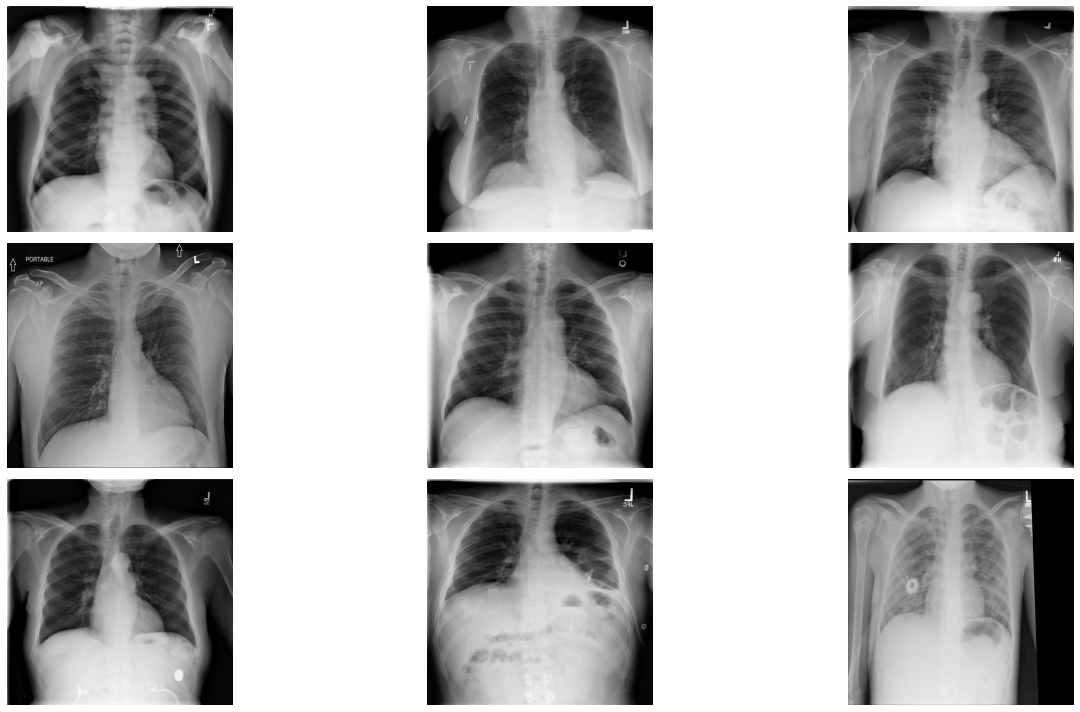

In [8]:
images = train_df['Image'].values

# Extrair 9 imagens aleatórias
random_images = [np.random.choice(images) for i in range(9)]

# Localizar imagens no diretório
img_dir = '/content/drive/MyDrive/0_Cursos/1. Coursera/AI Medicine /Code/data/images/nih/images-small/'

print('Mostrar Imagens Aleatórias')

# Ajuste do tamanho das  imagens
plt.figure(figsize = (20,10))

# Iteração para mostrar as imagens
for i in range(9):
    plt.subplot(3,3,i+1)
    img = plt.imread(os.path.join(img_dir, random_images[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

#Ajuste dos parametros do subplot (padding)
plt.tight_layout()

### Analisar os detalhes de uma imagem

A dimensão da imagem é 1024 pixels de largura e 1024 pixels de altura. Um único canal de cor.
O valor máximo de pixel é 0.9804 e o valor mínimo é 0.0000
O valor médio de pixel é 0.47961413860321045 e  o desvio padrão é 0.2757


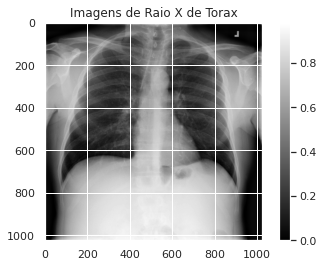

In [9]:
# Primeira imagem listada no Dataframe
sample_img = train_df.Image[0]

raw_image = plt.imread(os.path.join(img_dir, sample_img))

plt.imshow(raw_image, cmap = 'gray')
plt.colorbar()

plt.title('Imagens de Raio X de Torax')
print(f'A dimensão da imagem é {raw_image.shape[0]} pixels de largura e {raw_image.shape[1]} pixels de altura. Um único canal de cor.')
print(f'O valor máximo de pixel é {raw_image.max():.4f} e o valor mínimo é {raw_image.min():.4f}')
print(f'O valor médio de pixel é {raw_image.mean()} e  o desvio padrão é {raw_image.std():.4f}')

### Distribuição dos valores de Pixels

Text(-10.824999999999996, 0.5, 'Pixels na Imagem')

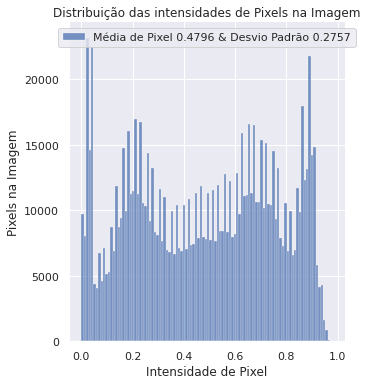

In [10]:
    sns.displot(raw_image.ravel(),
                label = f'Média de Pixel {np.mean(raw_image):.4f} & Desvio Padrão {np.std(raw_image):.4f}', kde= False)
    plt.legend(loc = 'upper center')
    plt.title('Distribuição das intensidades de Pixels na Imagem')
    plt.xlabel('Intensidade de Pixel')
    plt.ylabel('Pixels na Imagem')

<a name="image-processing"></a>
## Processamento de Imagem com Keras

Antes de treinar, primeiro é preciso modificar as  imagens para que sejam mais adequadas ao treinamento de uma rede neural convolucional. Para esta tarefa, será utilizada a função Keras <a href = "https://keras.io/preprocessing/image/">ImageDataGenerator</a> para realizar o pré-processamento e aumento de dados.

In [11]:
# Import Data Generator from Keras
from keras.preprocessing.image import ImageDataGenerator

In [12]:
#Normalização das Imagens
image_generator = ImageDataGenerator(
    samplewise_center = True, #Define cada amostra xom média 0
    samplewise_std_normalization = True #Divide cada entrada pelo Desvio Padrão
)

### Padronização - Standardization

O `image_generator` acima atuará para ajustar os dados da imagem de forma que a nova média dos dados seja zero e o desvio padrão seja 1.

Em outras palavras, o gerador substituirá cada valor de pixel na imagem por um novo valor calculado subtraindo a média e dividindo pelo desvio padrão.

$$\frac {x_i - \mu} {\sigma} $$

In [13]:
# pré-processar seus dados usando o `image_generator`. 
generator = image_generator.flow_from_dataframe(
    dataframe = train_df,
    directory = '/content/drive/MyDrive/0_Cursos/1. Coursera/AI Medicine /Code/data/images/nih/images-small/',
    x_col = 'Image', # Features , caracteristicas
    y_col = ['Mass'], #Labels, Rótulos
    class_mode = 'raw',# pode ser a coluna 'Mass' no DataFrame
    batch_size = 1, #imagens por bloco 
    shuffle = False, # Embaralhar as linhas  ou não
    target_size = (320,320) # Largura e Altura das imagens de Saída
                            #reduzirá o tamanho da imagem para 320x320 pixels
)

Found 1000 validated image filenames.


### Imagem Processada


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


A dimensão da imagem é 1 pixels de largura e 320 pixels de altura.
O valor máximo de pixel é 1.7999 e o valor mínimo é -1.7404
O valor médio de pixel é 0.0000 e  o desvio padrão é 1.0000


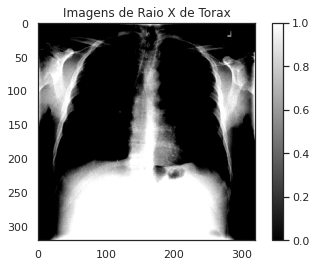

In [14]:
sns.set_style('white')
generated_image, label = generator.__getitem__(0)
plt.imshow(generated_image[0],cmap = 'gray')
plt.colorbar()
plt.title('Imagens de Raio X de Torax')
print(f'A dimensão da imagem é {generated_image.shape[0]} pixels de largura e {generated_image.shape[1]} pixels de altura.')
print(f'O valor máximo de pixel é {generated_image.max():.4f} e o valor mínimo é {generated_image.min():.4f}')
print(f'O valor médio de pixel é {generated_image.mean():.4f} e  o desvio padrão é {generated_image.std():.4f}')

### Nova Distribuição de Pixels - Imagem Processada

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '# Pixel')

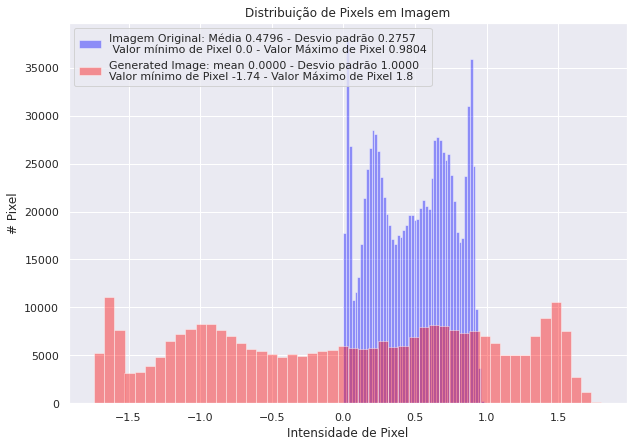

In [15]:
# Include a histogram of the distribution of the pixels
sns.set()
plt.figure(figsize=(10, 7))

# Histograma das imagens originais
sns.distplot(raw_image.ravel(), 
             label=f'Imagem Original: Média {np.mean(raw_image):.4f} - Desvio padrão {np.std(raw_image):.4f} \n '
             f'Valor mínimo de Pixel {np.min(raw_image):.4} - Valor Máximo de Pixel {np.max(raw_image):.4}',
             color='blue', 
             kde=False)

# Histograma das imagens processadas
sns.distplot(generated_image[0].ravel(), 
             label=f'Generated Image: mean {np.mean(generated_image[0]):.4f} - Desvio padrão {np.std(generated_image[0]):.4f} \n'
             f'Valor mínimo de Pixel {np.min(generated_image[0]):.4} - Valor Máximo de Pixel {np.max(generated_image[0]):.4}', 
             color='red', 
             kde=False)

# Place legends
plt.legend()
plt.title('Distribuição de Pixels em Imagem')
plt.xlabel('Intensidade de Pixel')
plt.ylabel('# Pixel')